In [1]:
from pybit.unified_trading import HTTP
import pandas as pd
import pandas_ta as ta
import numpy as np
from time import sleep
from asdf import (
    get_dataframe,
    get_full_dataframe,
    get_signal_for_candle,
    SignalType,
    Signal,
)
from decouple import config
import matplotlib.pyplot as plt
from constants import API_KEY, SECRET_KEY, TAKE_PROFIT, STOP_LOSS, SYMBOL, SCALE, RANGE



session = HTTP()
position_opened = False

df = get_dataframe(session, SYMBOL, SCALE, RANGE)
df = get_full_dataframe(df)

signals: [Signal] = []
current_signal = None


for i in range(0, len(df.index) - 2):
    low, high = df["lowest"].iloc[i - 1], df["highest"].iloc[i - 1]
    # probable signal on current candle
    signal: Signal = get_signal_for_candle(
        df,
        i,
        bool(current_signal),
        take_profit=TAKE_PROFIT,
        stop_loss=STOP_LOSS,
    )
    if signal.type == SignalType.LONG:
        print(signal)
        signals.append(signal)
        current_signal = signal
        # LONG
    elif current_signal:
        if low < current_signal.stop_loss:
            print("STOP LOSS")
            current_signal = None
        elif high > current_signal.take_profit:
            print("TAKE_PROFIT")
            current_signal = None
    # signal: Signal = get_signal_for_candle(df, i, False)
    # if signal.type == SignalType.LONG:
    #     signals.append(signal)
    #     position_opened = True
    # elif signal.type == SignalType.SHORT:
    #     signals.append(signal)
    #     position_opened = False
    # else:
    #     pass

/tmp/ipykernel_45642/1223973487.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Time: 2024-03-16 06:00:00, type: SignalType.BUY, entry: 1.9029, tp: 1.998045, sl: 1.8553275


In [2]:
sti = ta.supertrend(df['highest'], df['lowest'], df['close'], length=10, multiplier=3)
sti

,SUPERT_10_3.0,SUPERTd_10_3.0,SUPERTl_10_3.0,SUPERTs_10_3.0
1710285600,0.0000,1,NaN,NaN
1710285900,NaN,1,NaN,NaN
1710286200,NaN,1,NaN,NaN
1710286500,NaN,1,NaN,NaN
1710286800,NaN,1,NaN,NaN
...,...,...,...,...
1710584100,1.8971,1,1.8971,NaN
1710584400,1.8971,1,1.8971,NaN
1710584700,1.8971,1,1.8971,NaN
1710585000,1.8971,1,1.8971,NaN


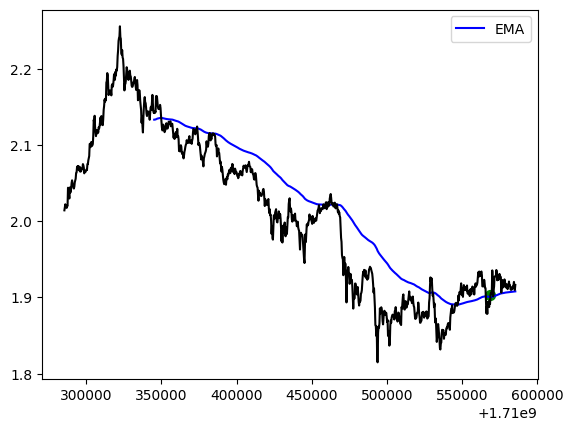

In [3]:
# plt.plot(df["MACDs_12_26_9"], label="signal", color="red")
plt.plot(df["EMA_200"], label="EMA", color="blue")
plt.plot(df['close'], color='black')
for signal in signals:
    if signal.type == SignalType.LONG:
        plt.scatter(signal.unix, signal.entry_point, color='green', s=50, marker='o')
    else:
        plt.scatter(signal.unix, signal.entry_point, color='red', s=50, marker='o')
plt.legend()
plt.show()

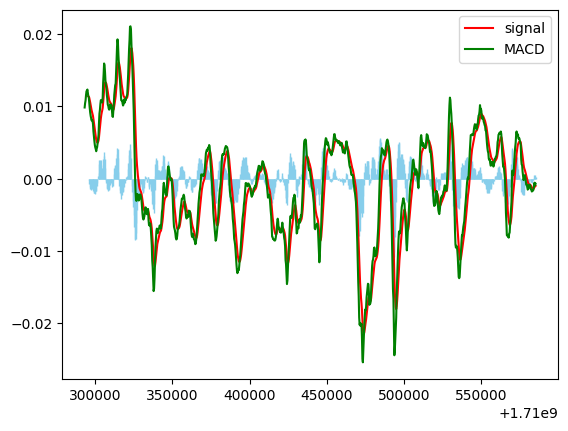

In [4]:
plt.plot(df['MACDs_12_26_9'], label='signal', color='red')
plt.plot(df['MACD_12_26_9'], label='MACD', color='green')
# plt.plot(df['MACDh_12_26_9'], label='histogram', color='blue')
plt.bar(df.index, df['MACDh_12_26_9'], color='skyblue', edgecolor='skyblue')
plt.legend()
plt.show()